## Stock Prediction on Dow Jones Index

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")

In [8]:
#pip install pmdarima

     ------------------------------------- 602.3/602.3 KB 26.6 kB/s eta 0:00:00



In [9]:
#loading all the required libraries:

import os

plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math



In [2]:
#Load the dataset

df=pd.read_csv("dow_jones_index.csv")
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


In [3]:
#checking datatypes
df.dtypes

quarter                                 int64
stock                                  object
date                                   object
open                                   object
high                                   object
low                                    object
close                                  object
volume                                  int64
percent_change_price                  float64
percent_change_volume_over_last_wk    float64
previous_weeks_volume                 float64
next_weeks_open                        object
next_weeks_close                       object
percent_change_next_weeks_price       float64
days_to_next_dividend                   int64
percent_return_next_dividend          float64
dtype: object

In [4]:
#checking null values

df.isnull().sum()

quarter                                0
stock                                  0
date                                   0
open                                   0
high                                   0
low                                    0
close                                  0
volume                                 0
percent_change_price                   0
percent_change_volume_over_last_wk    30
previous_weeks_volume                 30
next_weeks_open                        0
next_weeks_close                       0
percent_change_next_weeks_price        0
days_to_next_dividend                  0
percent_return_next_dividend           0
dtype: int64

In [5]:
#checking percent null values

percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

quarter                               0.0
stock                                 0.0
date                                  0.0
open                                  0.0
high                                  0.0
low                                   0.0
close                                 0.0
volume                                0.0
percent_change_price                  0.0
percent_change_volume_over_last_wk    4.0
previous_weeks_volume                 4.0
next_weeks_open                       0.0
next_weeks_close                      0.0
percent_change_next_weeks_price       0.0
days_to_next_dividend                 0.0
percent_return_next_dividend          0.0
dtype: float64

In [6]:
df.columns

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')

replce the nan values with mean

In [10]:
df['percent_change_volume_over_last_wk']=df['percent_change_volume_over_last_wk'].fillna(np.mean(df['percent_change_volume_over_last_wk']))
df['previous_weeks_volume']=df['previous_weeks_volume'].fillna(np.mean(df['previous_weeks_volume']))

In [11]:
df.isnull().sum()

quarter                               0
stock                                 0
date                                  0
open                                  0
high                                  0
low                                   0
close                                 0
volume                                0
percent_change_price                  0
percent_change_volume_over_last_wk    0
previous_weeks_volume                 0
next_weeks_open                       0
next_weeks_close                      0
percent_change_next_weeks_price       0
days_to_next_dividend                 0
percent_return_next_dividend          0
dtype: int64

In [24]:
#setting index as date
df['date'] = pd.to_datetime(df.date,format='%m/%d/%Y')
df.index = df['date']

In [18]:
df.head()

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,,
2011-01-07,1,AA,2011-01-07,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,5.593627,1.173876e+08,$16.71,$15.97,-4.428490,26,0.182704
2011-01-14,1,AA,2011-01-14,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,2.396556e+08,$16.19,$15.79,-2.470660,19,0.187852
2011-01-21,1,AA,2011-01-21,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,2.429634e+08,$15.87,$16.13,1.638310,12,0.189994
2011-01-28,1,AA,2011-01-28,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,1.384285e+08,$16.18,$17.14,5.933250,5,0.185989
2011-02-04,1,AA,2011-02-04,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,1.513792e+08,$17.33,$17.37,0.230814,97,0.175029


In [27]:
df.dtypes

quarter                                        int64
stock                                         object
date                                  datetime64[ns]
open                                          object
high                                          object
low                                           object
close                                         object
volume                                         int64
percent_change_price                         float64
percent_change_volume_over_last_wk           float64
previous_weeks_volume                        float64
next_weeks_open                               object
next_weeks_close                              object
percent_change_next_weeks_price              float64
days_to_next_dividend                          int64
percent_return_next_dividend                 float64
dtype: object

In [33]:
#replacing '$' values ' '

df['open'] = df['open'].str.replace('$',' ')
df['high'] = df['high'].str.replace('$',' ')
df['low'] = df['low'].str.replace('$',' ')
df['close'] = df['close'].str.replace('$',' ')
df['next_weeks_open'] = df['next_weeks_open'].str.replace('$',' ')
df['next_weeks_close'] = df['next_weeks_close'].str.replace('$',' ')
df.head(5)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,,
2011-01-07,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,5.593627,1.173876e+08,16.71,15.97,-4.428490,26,0.182704
2011-01-14,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,2.396556e+08,16.19,15.79,-2.470660,19,0.187852
2011-01-21,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,2.429634e+08,15.87,16.13,1.638310,12,0.189994
2011-01-28,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,1.384285e+08,16.18,17.14,5.933250,5,0.185989
2011-02-04,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,1.513792e+08,17.33,17.37,0.230814,97,0.175029


In [37]:
#changing the datatype

df['open'] = df['open'].astype('float')
df['high'] = df['high'].astype('float')
df['low'] = df['low'].astype('float')
df['close'] = df['close'].astype('float')
df['next_weeks_open'] = df['next_weeks_open'].astype('float')
df['next_weeks_close'] = df['next_weeks_close'].astype('float')
df.head(5)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
date,,,,,,,,,,,,,,,,
2011-01-07,1,AA,2011-01-07,15.82,16.72,15.78,16.42,239655616,3.79267,5.593627,1.173876e+08,16.71,15.97,-4.428490,26,0.182704
2011-01-14,1,AA,2011-01-14,16.71,16.71,15.64,15.97,242963398,-4.42849,1.380223,2.396556e+08,16.19,15.79,-2.470660,19,0.187852
2011-01-21,1,AA,2011-01-21,16.19,16.38,15.60,15.79,138428495,-2.47066,-43.024959,2.429634e+08,15.87,16.13,1.638310,12,0.189994
2011-01-28,1,AA,2011-01-28,15.87,16.63,15.82,16.13,151379173,1.63831,9.355500,1.384285e+08,16.18,17.14,5.933250,5,0.185989
2011-02-04,1,AA,2011-02-04,16.18,17.39,16.18,17.14,154387761,5.93325,1.987452,1.513792e+08,17.33,17.37,0.230814,97,0.175029


In [40]:
#First Encoding the data 

import sklearn
from sklearn.preprocessing import LabelEncoder

lencoder=LabelEncoder()
df['stock']=lencoder.fit_transform(df['stock'])

In [41]:
df.dtypes

quarter                                        int64
stock                                          int32
date                                  datetime64[ns]
open                                         float64
high                                         float64
low                                          float64
close                                        float64
volume                                         int64
percent_change_price                         float64
percent_change_volume_over_last_wk           float64
previous_weeks_volume                        float64
next_weeks_open                              float64
next_weeks_close                             float64
percent_change_next_weeks_price              float64
days_to_next_dividend                          int64
percent_return_next_dividend                 float64
dtype: object

Visualize the per day closing price of the stock.

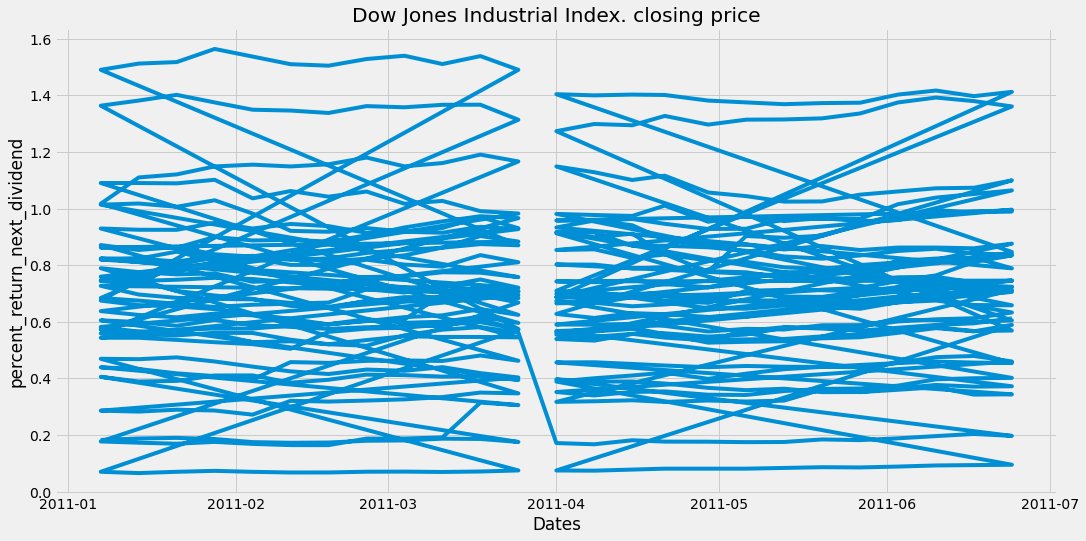

In [70]:
#plot close price
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('percent_return_next_dividend')
plt.plot(df['percent_return_next_dividend'])
plt.title('Dow Jones Industrial Index. closing price')
plt.show()

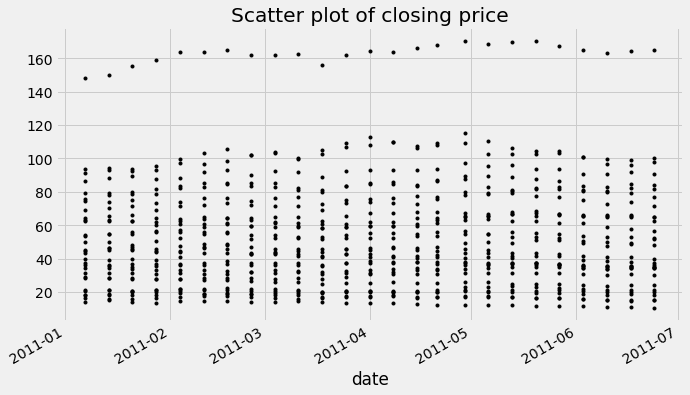

In [43]:
df_close = df['close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()


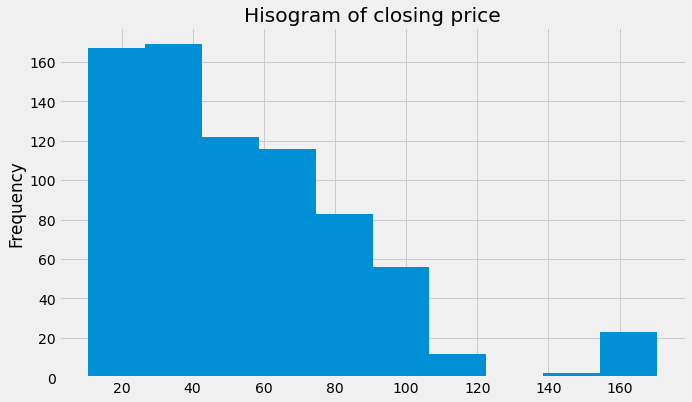

In [47]:
plt.figure(figsize=(10,6))
df_close = df['close']
df_close.plot(style='k.',kind='hist')
plt.title('Hisogram of closing price')
plt.show()

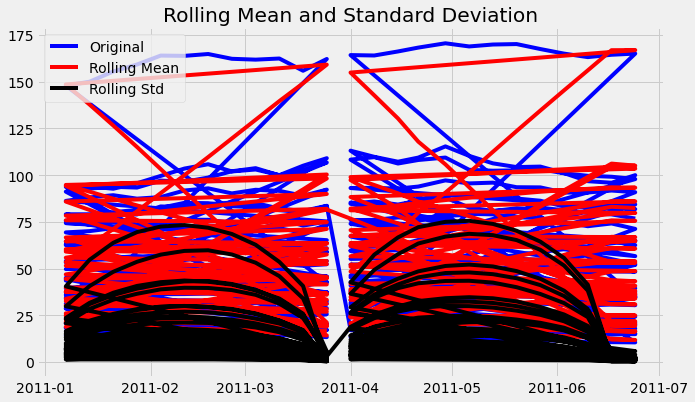

Results of Dow Jones Industrial Index
Test Statistics                 -5.267919
p-value                          0.000006
No. of lags used                13.000000
Number of observations used    736.000000
critical value (1%)             -3.439266
critical value (5%)             -2.865475
critical value (10%)            -2.568865
dtype: float64


In [71]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of Dow Jones Industrial Index")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

We see that the p-value is less than 0.05 so we can reject the Null hypothesis. Also, the test statistics is less than the critical values. so the data is stationary.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


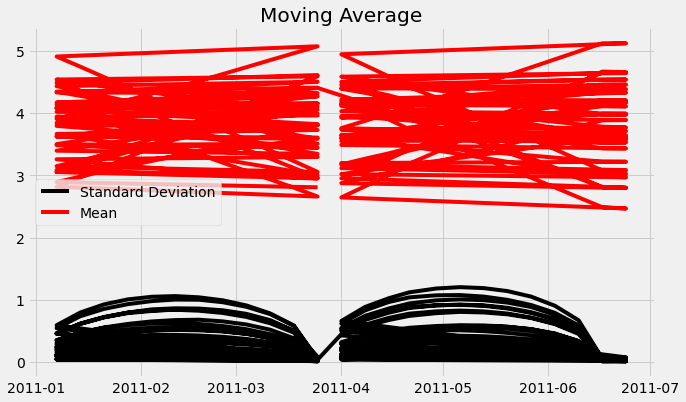

In [72]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()


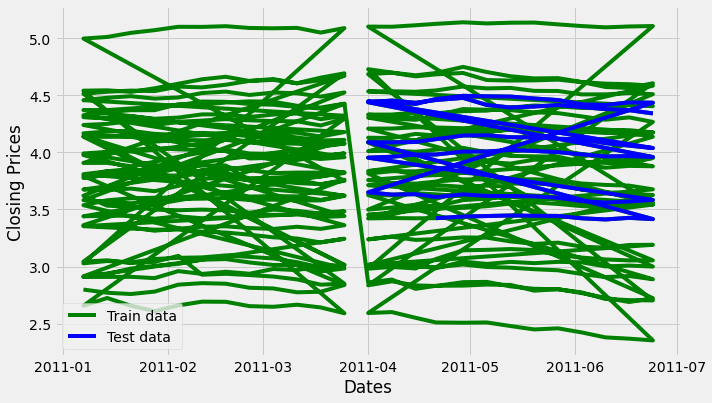

In [51]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


In [73]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3715.447, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2865.950, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=289.055, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=289.752, Time=0.67 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=291.016, Time=0.21 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2194.025, Time=0.67 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=292.972, Time=0.60 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=249.385, Time=0.49 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=765.148, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=248.903, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1295.632, Time=0.11 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=249.160, Time=0.25 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=251.197, 

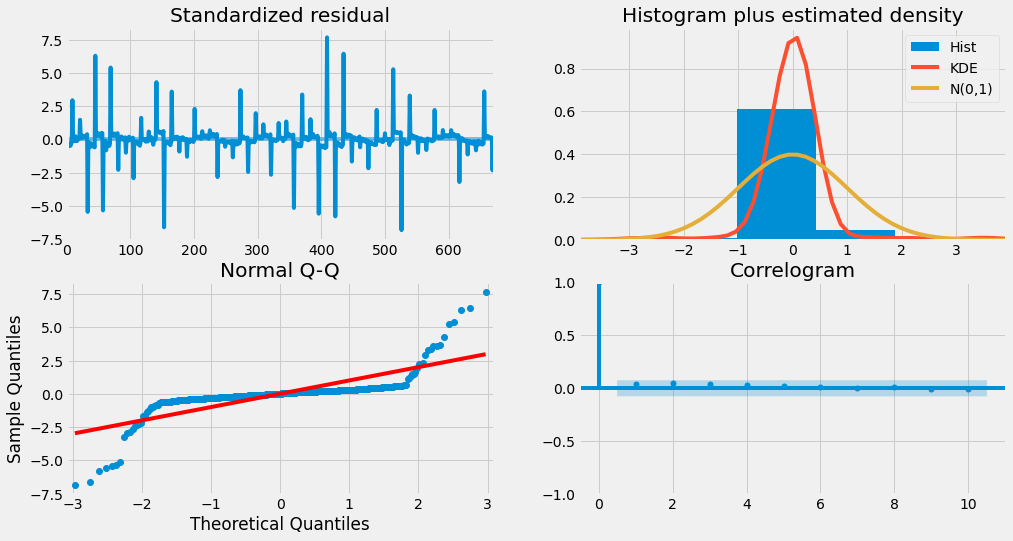

In [54]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [78]:
from statsmodels.tsa.arima.model import ARIMA

import warnings

warnings.filterwarnings("ignore")
#model = ARIMA(dataFrame.columnName, order=(1,0,0))

#from statsmodels.tsa.arima_model import SARIMAX
model = ARIMA(train_data, order=(1, 0, 0))  
fitted = model.fit()  
print(fitted.summary())
#statsmodels.tsa.SARIMAX

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  672
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -121.451
Date:                Thu, 05 May 2022   AIC                            248.903
Time:                        18:33:01   BIC                            262.434
Sample:                             0   HQIC                           254.143
                                - 672                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.7660      0.099     38.042      0.000       3.572       3.960
ar.L1          0.8896      0.032     28.230      0.000       0.828       0.951
sigma2         0.0838      0.003     25.243      0.0

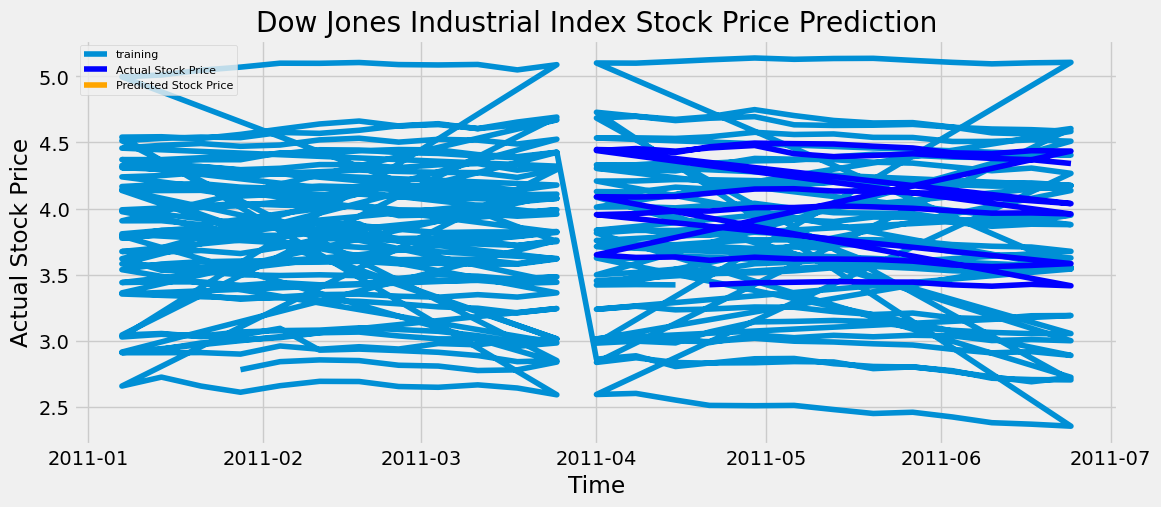

In [106]:
# Forecast

fc= fitted.forecast(75, alpha=0.05)  # 95% confidence
se= fitted.forecast(75, alpha=0.05)
conf = fitted.forecast(75, alpha=0.05)
fc_series = pd.Series(fc, index=test_data.index)
#lower_series = pd.Series(conf[:,0], index=test_data.index)
#upper_series = pd.Series(conf[:,1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
#plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=.10)
plt.title('Dow Jones Industrial Index Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [103]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
#mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
#print('MAPE: '+str(mape))


MSE: 0.20043381164547783
MAE: 0.3851009902071327
RMSE: 0.447698348942095


RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately.
Here value is RMSE: 0.4. Hence our model predict the data accurately